# **STINTSY Project**
**S16 Group <#>**

Names:

Adrada, Jasper John

David, Rain Caitlin Aelis

Badiola, Maxine Beatriz

Ogatia, Graham Joshua



# **Load Dataset**

In [349]:
import pandas as pd
file = 'pumpkin_seeds.csv'
df = pd.read_csv(file, encoding='latin1')

display(df.head(10))

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,erevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,erevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,erevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,erevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,erevelik
5,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,erevelik
6,73338,1020.055,392.2516,238.5494,73859,305.5762,0.7938,0.9929,0.7187,0.8857,1.6443,0.7790,erevelik
7,69692,1049.108,421.4875,211.7707,70442,297.8836,0.8646,0.9894,0.6736,0.7957,1.9903,0.7067,erevelik
8,95727,1231.609,488.1199,251.3086,96831,349.1180,0.8573,0.9886,0.6188,0.7930,1.9423,0.7152,erevelik
9,73465,1047.767,413.6504,227.2644,74089,305.8407,0.8356,0.9916,0.7443,0.8409,1.8201,0.7394,erevelik


# I. Introduction to the problem/task and dataset

# II. Description of the dataset

# III. List of requirements

In [350]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# IV. Data preprocessing and cleaning

## A. Cleaning the Dataset

Check for duplicates.

In [351]:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


Duplicate rows: 0


Check for null values.

In [352]:
null_val = df.isnull().sum()
print("Missing values in each column:\n",null_val)

Missing values in each column:
 Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64


Check the unique values in the `Class` column.

In [353]:
print("Class:", df['Class'].unique())

Class: ['\x82er\x8develik' '\x86rg\x9fp Sivrisi']


Replace the corrupted characters to fix the encoding issues.

In [354]:
df['Class'] = df['Class'].str.replace('\x82er\x8develik', 'Cercevelik', regex=False)
df['Class'] = df['Class'].str.replace('\x86rg\x9fp Sivrisi', 'Urgup Sivrisi', regex=False)
print("Fixed unique values in 'Class':", df['Class'].unique())


Fixed unique values in 'Class': ['Cercevelik' 'Urgup Sivrisi']


The models we are using are **Decision Trees**, **Logistic Regression**, and **KNN**. These models require numerical inputs therefore we need to encode the `Class` column to numerical values. Since the `Class` column is binary,  **label encoding (0,1)** is sufficient for this project.

In [355]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Class'] = encoder.fit_transform(df['Class'])

print(df['Class'].unique())  # Output: [0, 1]


[0 1]


## B. Check and Handle Outliers

In [356]:
from scipy.stats import zscore
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores for each numerical column
z_scores = df[numerical_cols].apply(zscore)

# Identify outliers (absolute Z-score > 3)
outliers = (z_scores.abs() > 3).sum()
print("Number of outliers in each column:")
print(outliers)


Number of outliers in each column:
Area                 13
Perimeter             8
Major_Axis_Length     8
Minor_Axis_Length     9
Convex_Area          13
Equiv_Diameter        9
Eccentricity         14
Solidity             29
Extent               13
Roundness             4
Aspect_Ration         8
Compactness           2
dtype: int64


Visually see the outliers.

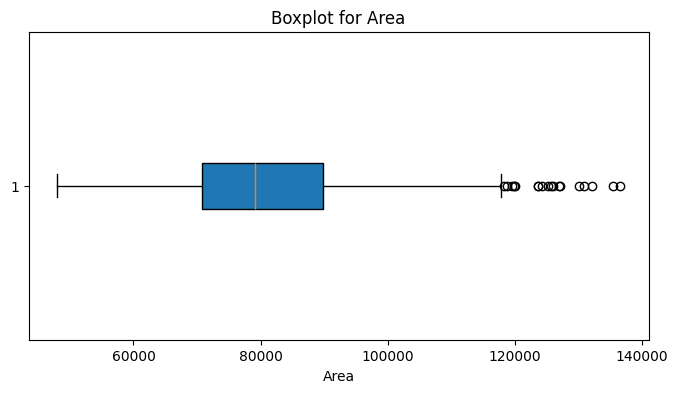

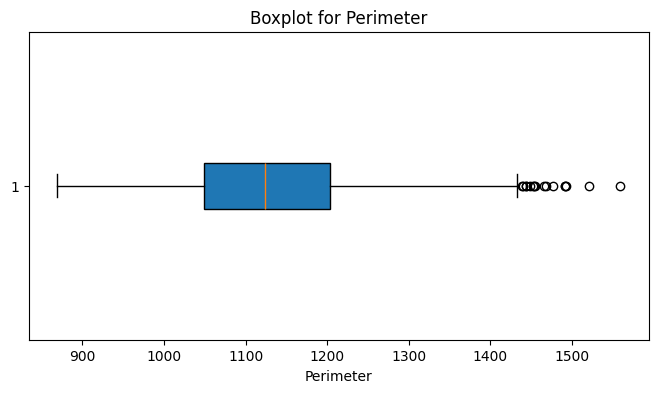

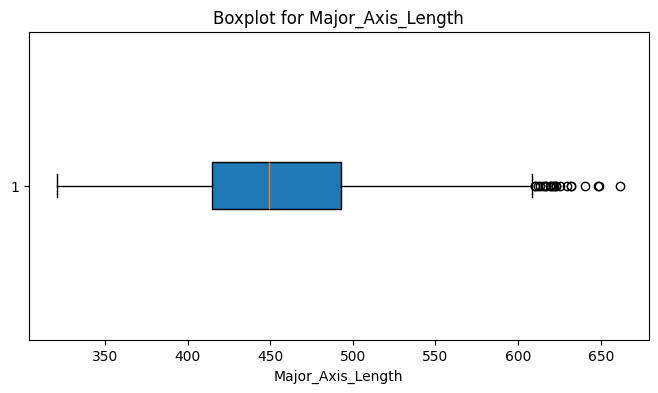

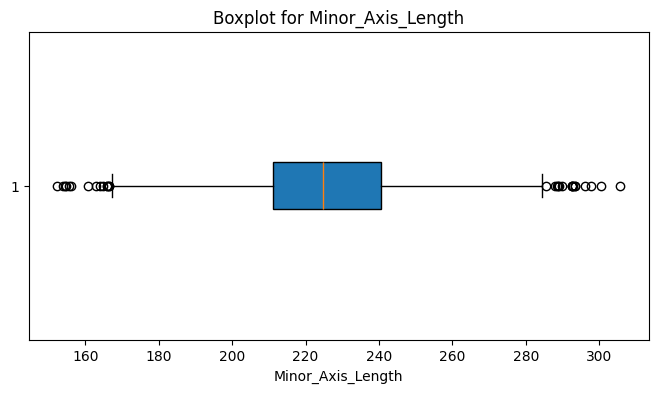

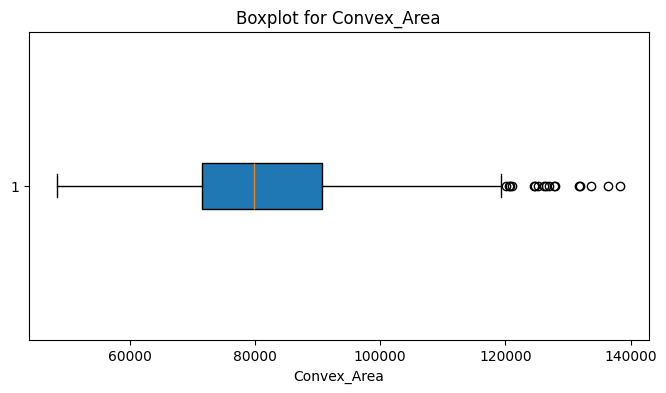

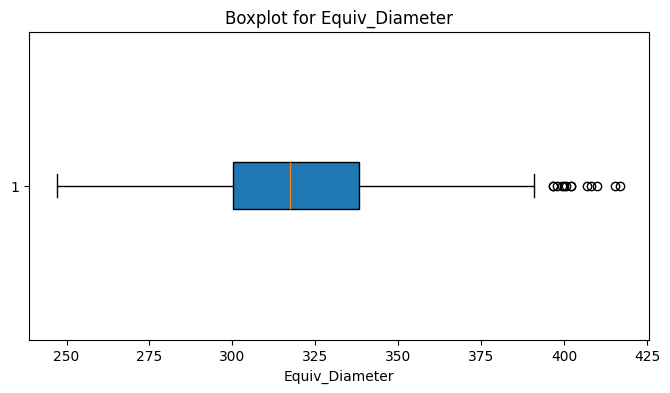

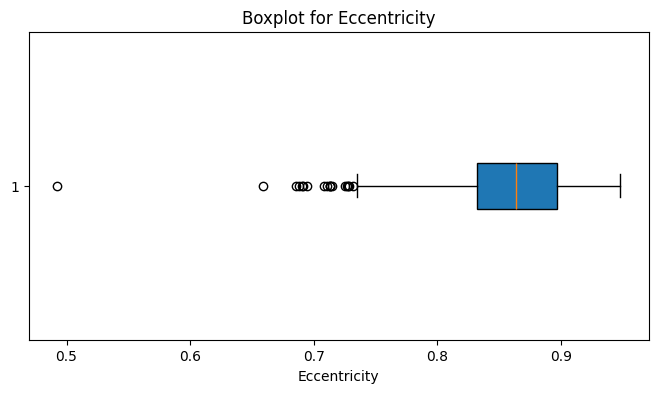

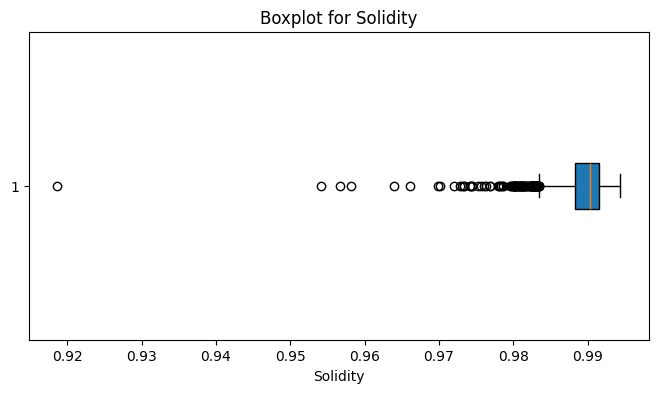

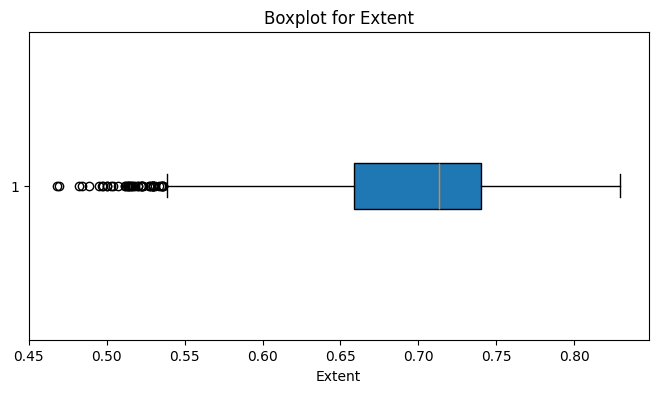

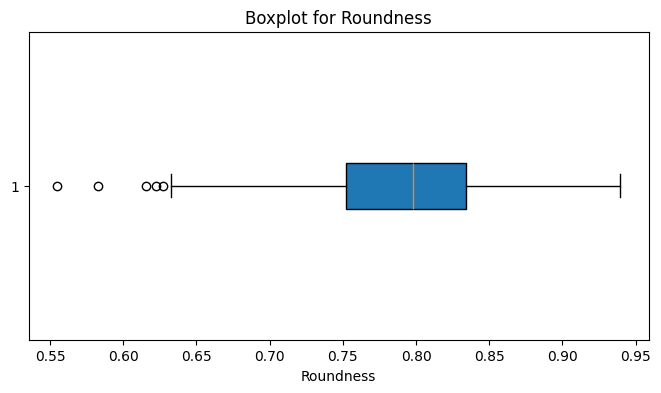

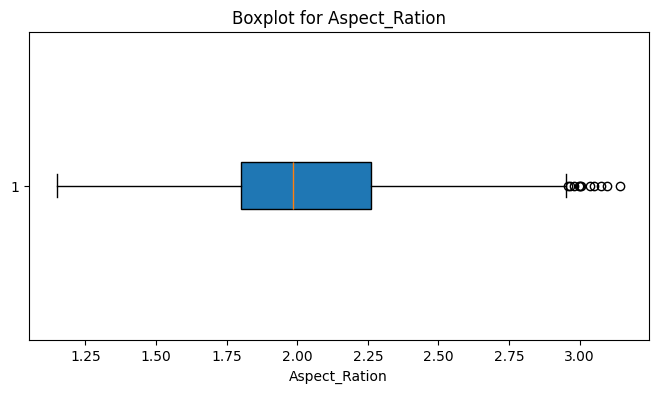

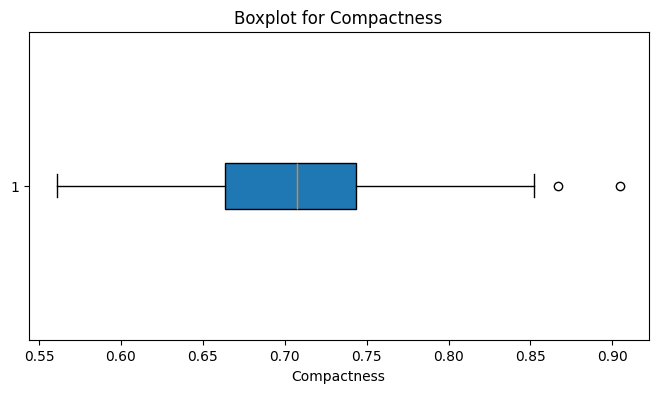

In [357]:
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[col], vert=False, patch_artist=True)
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.show()

Keep outliers because <explanation\>.

## C. Data Preprocessing

Make a copy of the dataset for each model as they will be preprocessed differently according to the following:
KNN - Normalization
Logistic Regression - Standardization
Decision Trees - Keep it as is

In [358]:
# Logistic Regression dataset
df_logistic = df.copy()

# KNN dataset
df_knn = df.copy()

# Decision Trees dataset
df_tree = df.copy()

### Normalization for KNN model.

Check data before normalization.

In [359]:
print(df_knn.describe())

                Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min 

Normalize data using MinMax Scale

In [360]:
from sklearn.preprocessing import MinMaxScaler

scaler_knn = MinMaxScaler()
df_knn[numerical_cols] = scaler_knn.fit_transform(df_knn[numerical_cols])

# Check the normalized data
print(df_knn.describe())


              Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count  2500.000000  2500.000000        2500.000000        2500.000000   
mean      0.369146     0.378882           0.398037           0.479173   
std       0.154166     0.158121           0.164882           0.151629   
min       0.000000     0.000000           0.000000           0.000000   
25%       0.257528     0.261004           0.275938           0.384482   
50%       0.351295     0.369320           0.377205           0.472067   
75%       0.471806     0.484620           0.503987           0.576006   
max       1.000000     1.000000           1.000000           1.000000   

       Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count  2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean      0.368172        0.425291      0.808727     0.935245     0.622800   
std       0.152904        0.158239      0.099051     0.046090     0.168456   
min       0.000000        0.00

Check normalized dataset.

In [361]:
display(df_knn)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0.094060,0.028593,0.015551,0.443011,0.094037,0.121346,0.538377,0.944591,0.766869,0.887532,0.166458,0.755304,0
1,0.323710,0.288960,0.282492,0.534065,0.321202,0.384261,0.735526,0.963061,0.683352,0.751688,0.316881,0.546062,0
2,0.267208,0.310438,0.337143,0.383178,0.269913,0.323187,0.839474,0.885224,0.752212,0.552727,0.459187,0.383900,0
3,0.208936,0.178831,0.178027,0.457938,0.208314,0.257917,0.702193,0.944591,0.751106,0.763636,0.283560,0.585876,0
4,0.204975,0.187652,0.184843,0.444415,0.208303,0.253390,0.716228,0.875989,0.573009,0.725195,0.296938,0.566405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.357624,0.515547,0.622479,0.249046,0.355651,0.419964,0.969079,0.951187,0.057522,0.292468,0.827229,0.106074,1
2496,0.244915,0.312365,0.416625,0.258055,0.242729,0.298503,0.916667,0.967018,0.365597,0.492987,0.633712,0.239756,1
2497,0.451910,0.494712,0.546449,0.455692,0.448088,0.515824,0.892325,0.968338,0.819414,0.520260,0.568272,0.287998,1
2498,0.361844,0.455106,0.530869,0.342223,0.361439,0.424359,0.923026,0.928760,0.745022,0.425714,0.652703,0.218251,1


### Standardization for Logistic Regression

Check Data Before Standardization.

In [362]:
print(df_logistic.describe())

                Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000000        2500.000000        2500.000000   
mean    80658.220800  1130.279015         456.601840         225.794921   
std     13664.510228   109.256418          56.235704          23.297245   
min     47939.000000   868.485000         320.844600         152.171800   
25%     70765.000000  1048.829750         414.957850         211.245925   
50%     79076.000000  1123.672000         449.496600         224.703100   
75%     89757.500000  1203.340500         492.737650         240.672875   
max    136574.000000  1559.450000         661.911300         305.818000   

         Convex_Area  Equiv_Diameter  Eccentricity     Solidity       Extent  \
count    2500.000000     2500.000000   2500.000000  2500.000000  2500.000000   
mean    81508.084400      319.334230      0.860879     0.989492     0.693205   
std     13764.092788       26.891920      0.045167     0.003494     0.060914   
min 

Standardize Data Using StandardScaler

In [363]:
from sklearn.preprocessing import StandardScaler

X_logistic = df_logistic.drop('Class', axis=1)  # Features
y_logistic = df_logistic['Class']  # Target

scaler_logistic = StandardScaler()

X_logistic_standardized = scaler_logistic.fit_transform(X_logistic)

X_logistic_standardized = pd.DataFrame(X_logistic_standardized, columns=X_logistic.columns)

df_logistic = X_logistic_standardized.copy()
df_logistic['Class'] = y_logistic

print(df_logistic.describe())

               Area     Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count  2.500000e+03  2.500000e+03       2.500000e+03       2.500000e+03   
mean   3.183231e-16  8.185452e-16       1.136868e-15      -6.821210e-17   
std    1.000200e+00  1.000200e+00       1.000200e+00       1.000200e+00   
min   -2.394946e+00 -2.396623e+00      -2.414559e+00      -3.160797e+00   
25%   -7.241533e-01 -7.456364e-01      -7.406740e-01      -6.246192e-01   
50%   -1.158137e-01 -6.048465e-02      -1.263728e-01      -4.687420e-02   
75%    6.660392e-01  6.688495e-01       6.427063e-01       6.387421e-01   
max    4.092863e+00  3.928894e+00       3.651604e+00       3.435560e+00   

        Convex_Area  Equiv_Diameter  Eccentricity      Solidity        Extent  \
count  2.500000e+03    2.500000e+03  2.500000e+03  2.500000e+03  2.500000e+03   
mean  -5.229595e-16    3.410605e-16  9.094947e-16  2.377192e-14  1.591616e-16   
std    1.000200e+00    1.000200e+00  1.000200e+00  1.000200e+00  1.000200e+00   


Check standardized dataset.

In [364]:
display(df_logistic)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280,0
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230,0
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483,0
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447,0
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.074750,0.864479,1.361498,-1.518003,-0.081902,-0.033672,1.619204,0.345960,-3.356315,-2.223692,2.398914,-2.013344,1
2496,-0.805987,-0.420755,0.112758,-1.458572,-0.820566,-0.801398,1.089955,0.689514,-1.527131,-0.842970,1.176505,-1.146340,1
2497,0.536956,0.732689,0.900287,-0.154887,0.522763,0.572244,0.844154,0.718144,1.167385,-0.655177,0.763128,-0.833465,1
2498,-0.047375,0.482155,0.805782,-0.903370,-0.044043,-0.005893,1.154174,-0.140743,0.725688,-1.306191,1.296467,-1.285814,1


The Decision Tree model does not require scaled data and can work directly with the original cleaned dataset. Therefore, the final datasets to be used for each model are as follows: `df_knn` for KNN, `df_logistic` for Logistic Regression, and `df_trees` for Decision Trees.

# V. Exploratory data analysis

Display dataset information.

In [365]:
display(df.head())
print(df.info())
print(df.describe())

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   int32  
dtypes: float64(10), int32(1), int64(2)
memory usage: 244.3 KB
None
                Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000

Analyze the `Class` Variable

Class
0    1300
1    1200
Name: count, dtype: int64


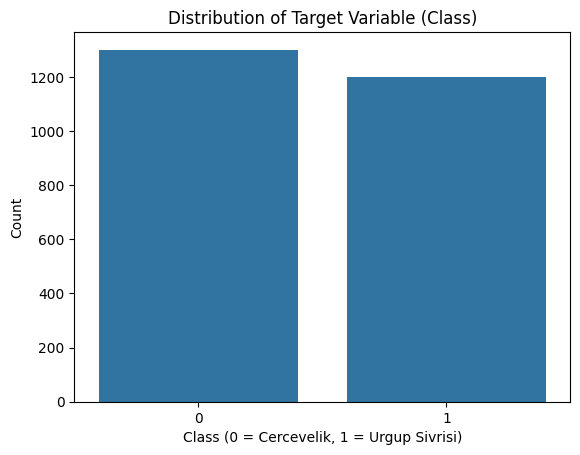

In [366]:
print(df['Class'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Class')
plt.title("Distribution of Target Variable (Class)")
plt.xlabel("Class (0 = Cercevelik, 1 = Urgup Sivrisi)")
plt.ylabel("Count")
plt.show()


Visualize the distribution of numerical features.

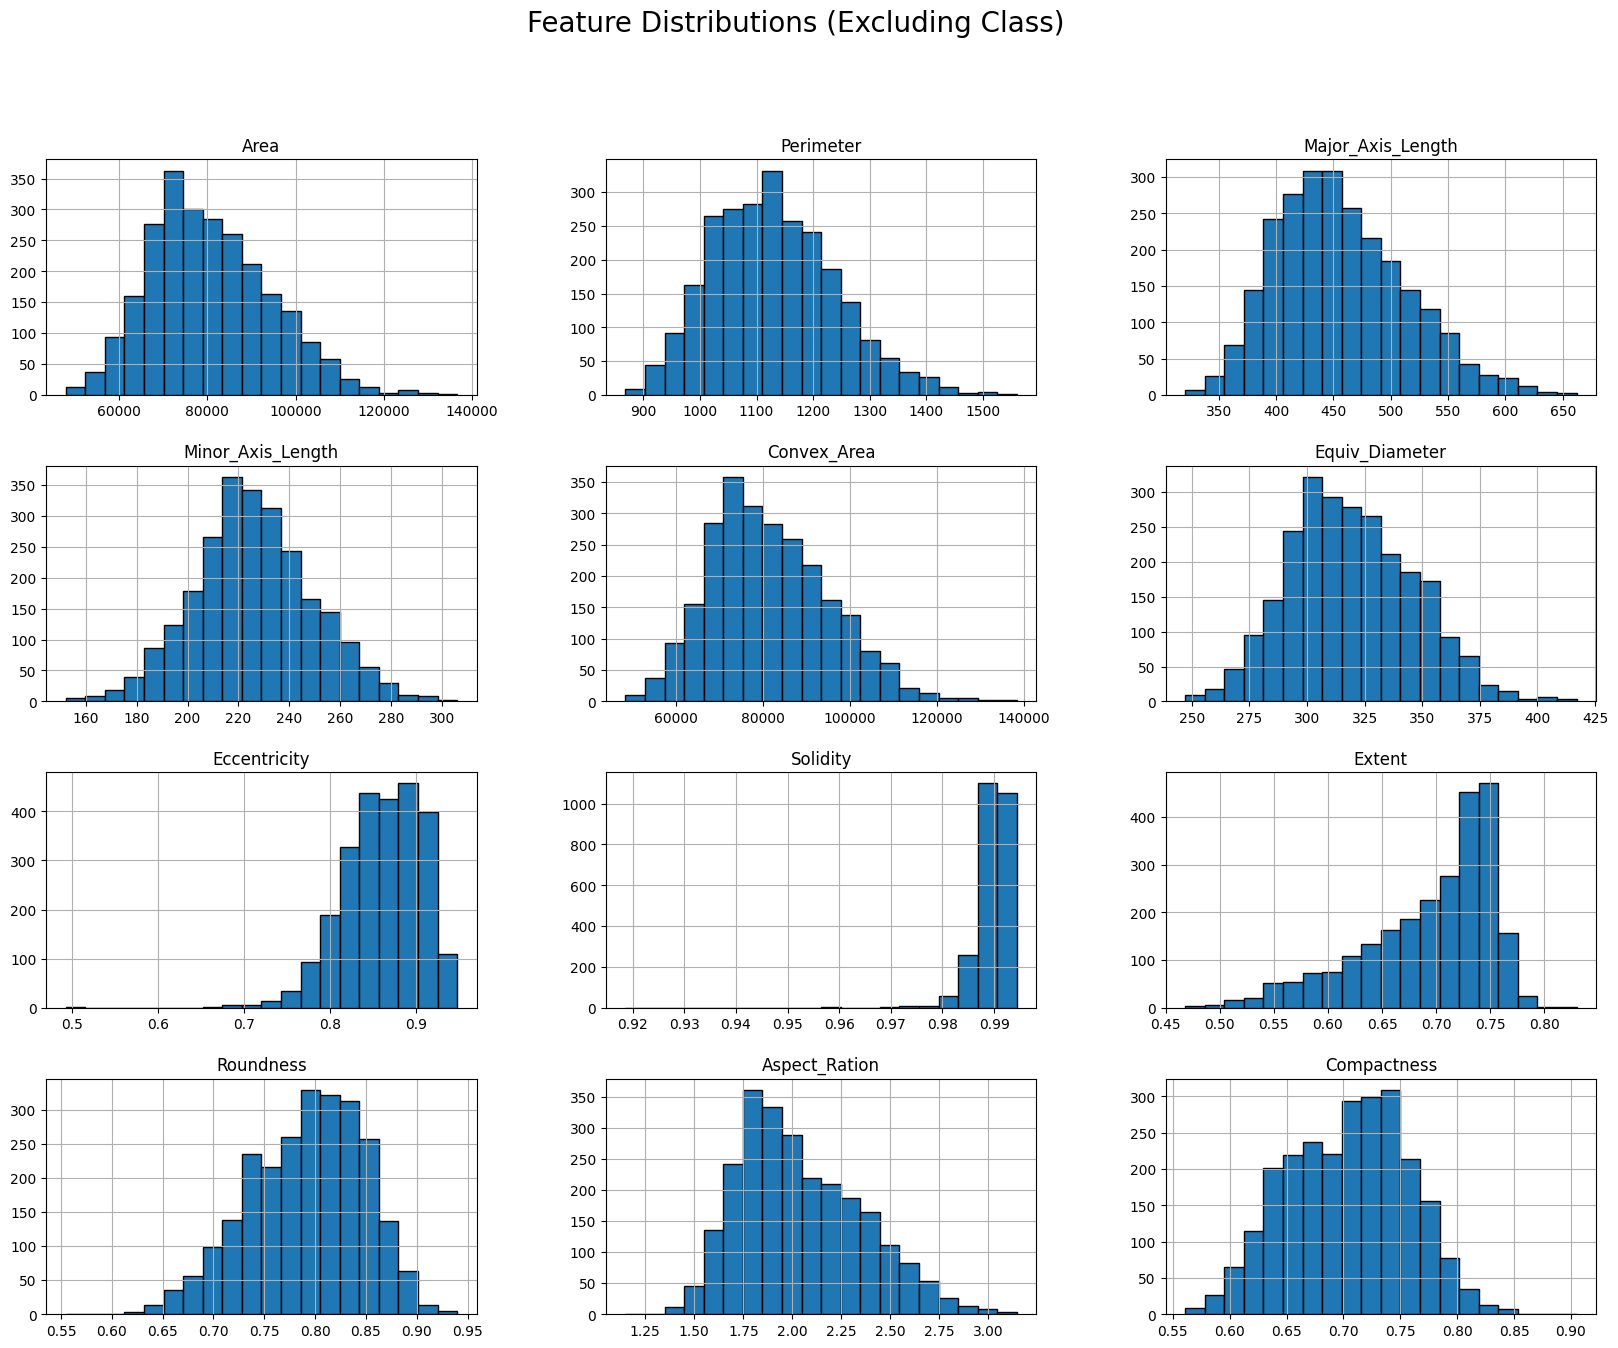

In [367]:
# Plot histograms for all numerical features
df.loc[:, df.columns != 'Class'].hist(bins=20, figsize=(20, 15), edgecolor='black')
plt.suptitle("Feature Distributions (Excluding Class)", fontsize=20)
plt.show()

Check correlation between pictures.

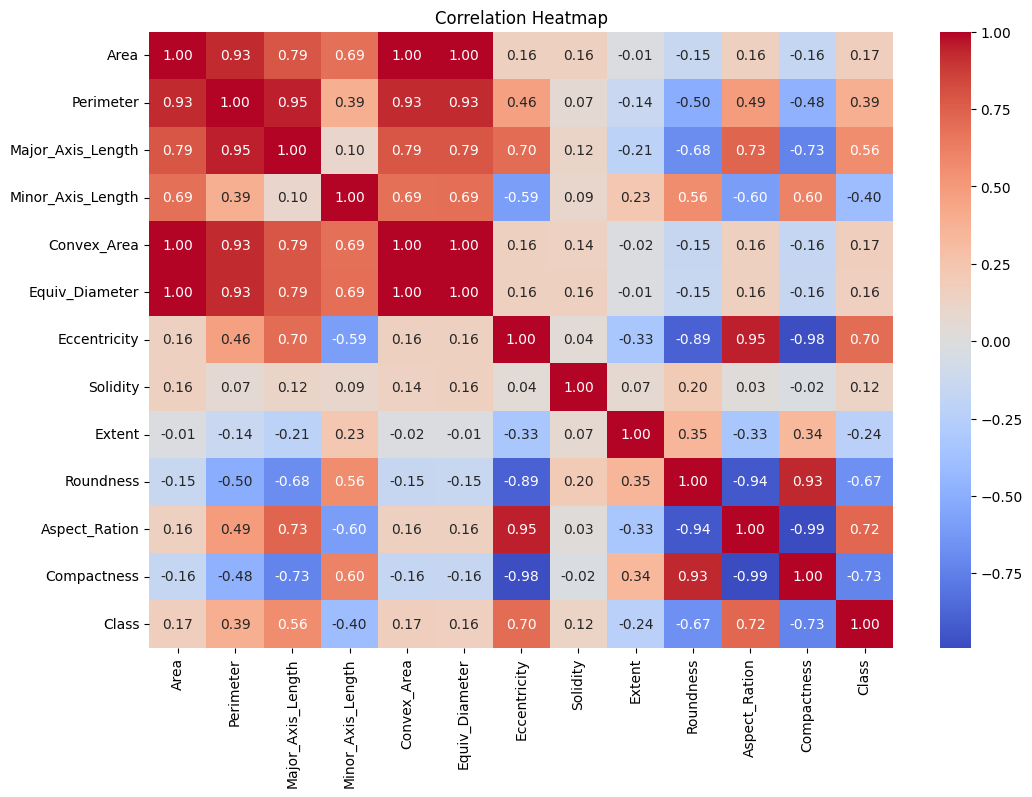

In [368]:
# correlation matrix
corr_matrix = df.corr()

#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


Visualize the relationship between features and the `Class` variable.

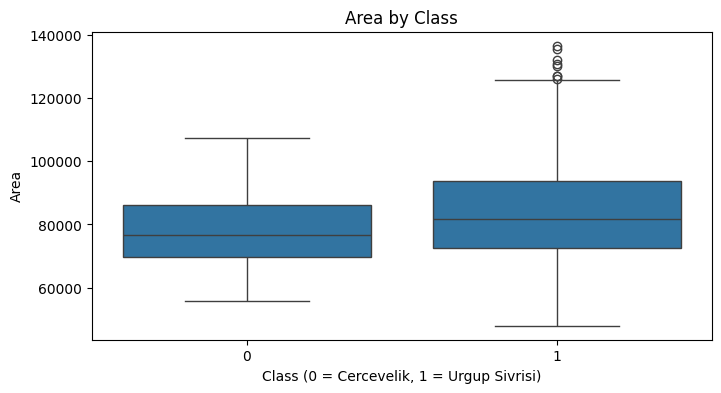

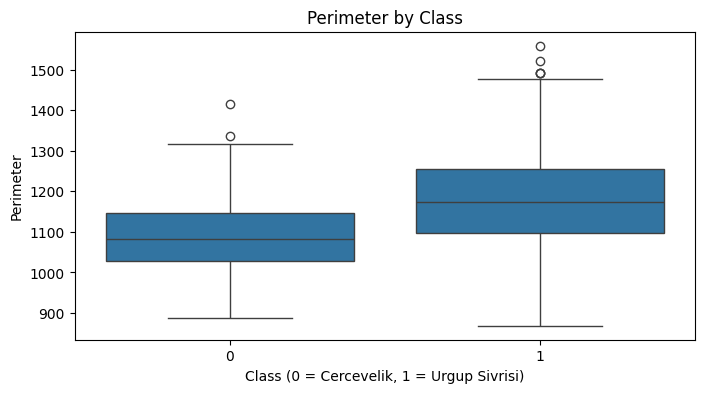

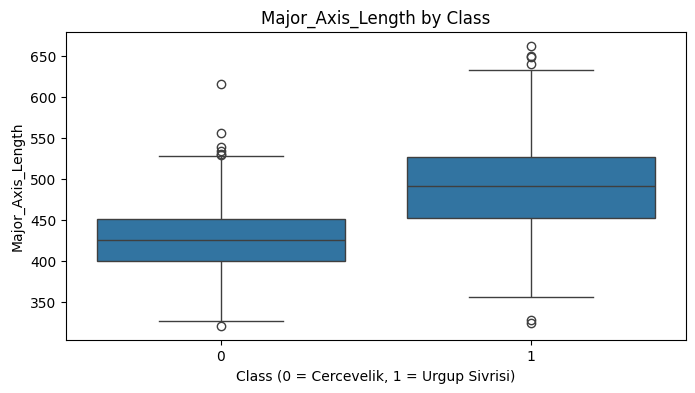

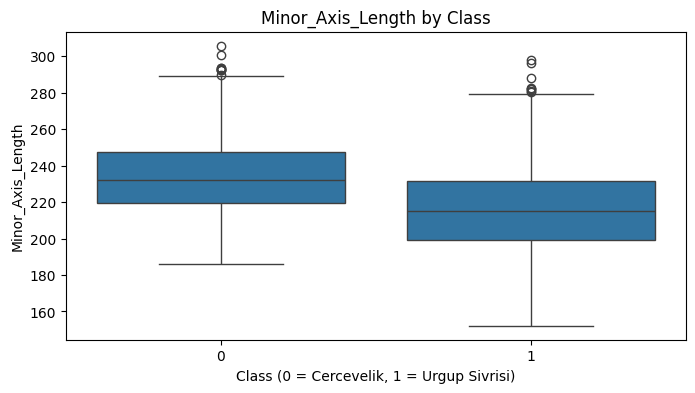

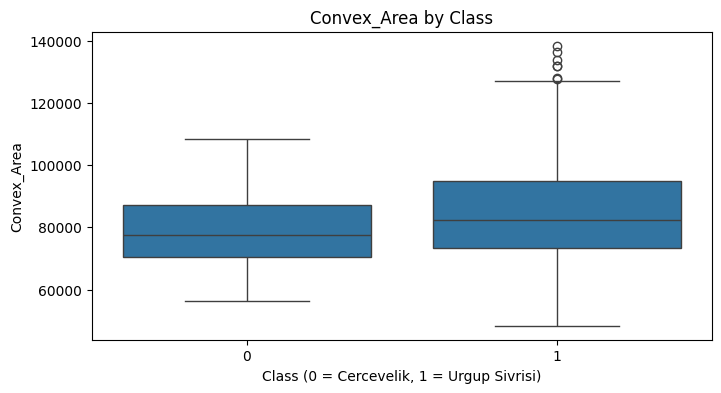

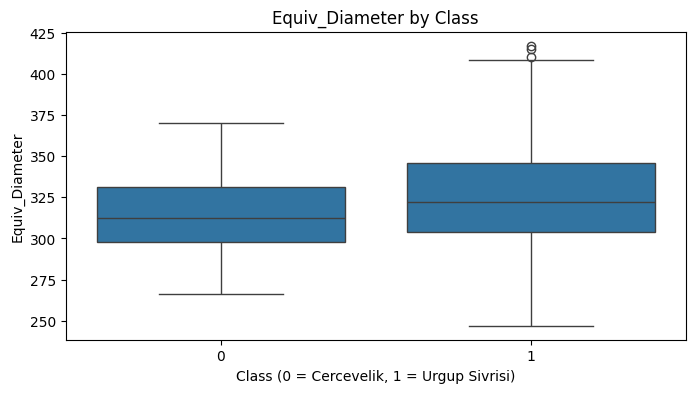

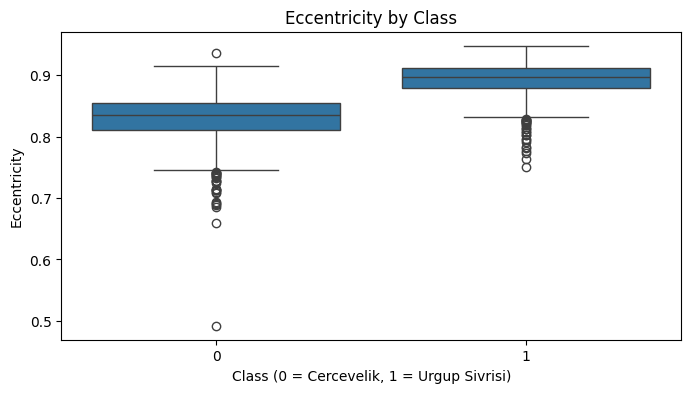

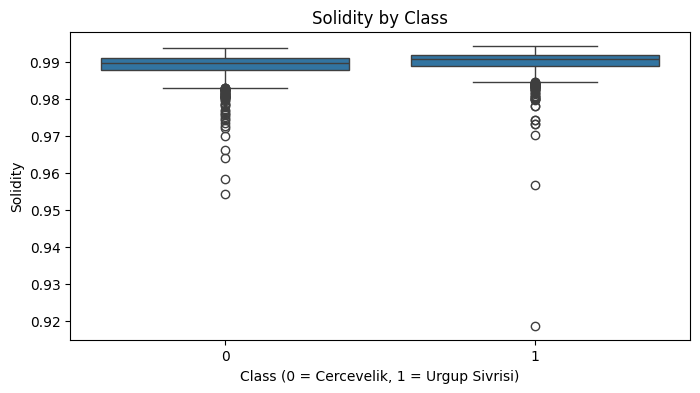

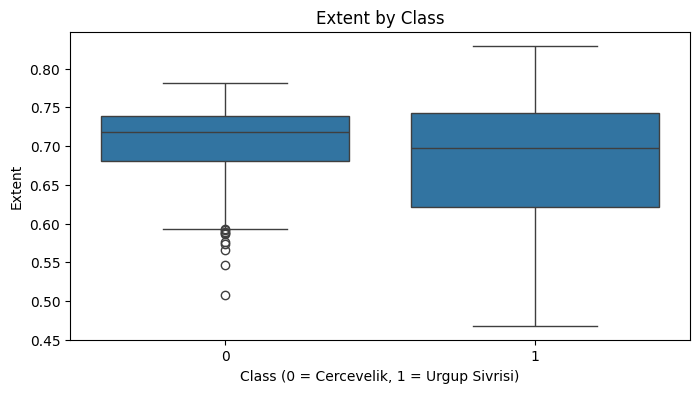

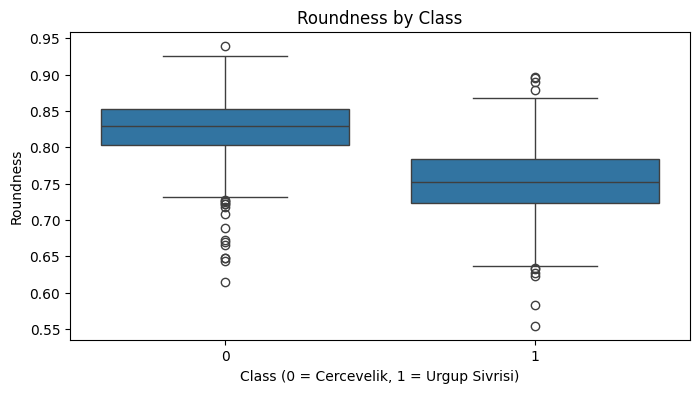

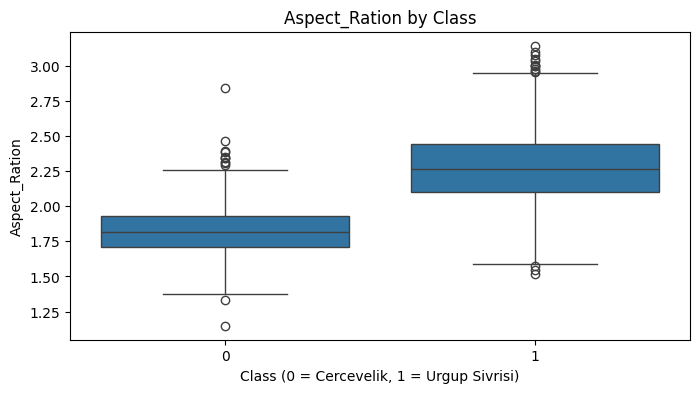

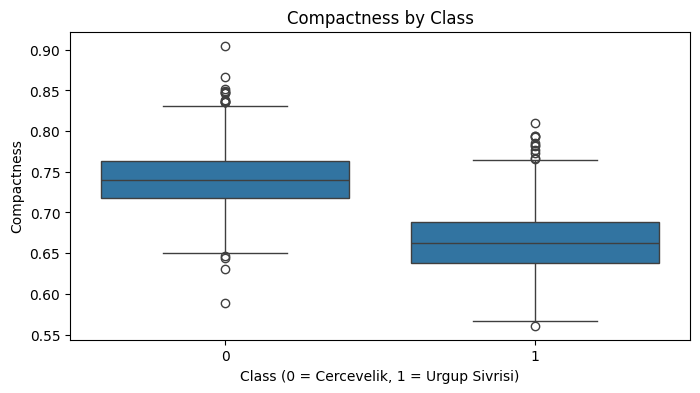

In [369]:
# Boxplots for numerical features grouped by 'Class'
for col in df.columns[:-1]:  # Exclude 'Class'
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f"{col} by Class")
    plt.xlabel("Class (0 = Cercevelik, 1 = Urgup Sivrisi)")
    plt.ylabel(col)
    plt.show()


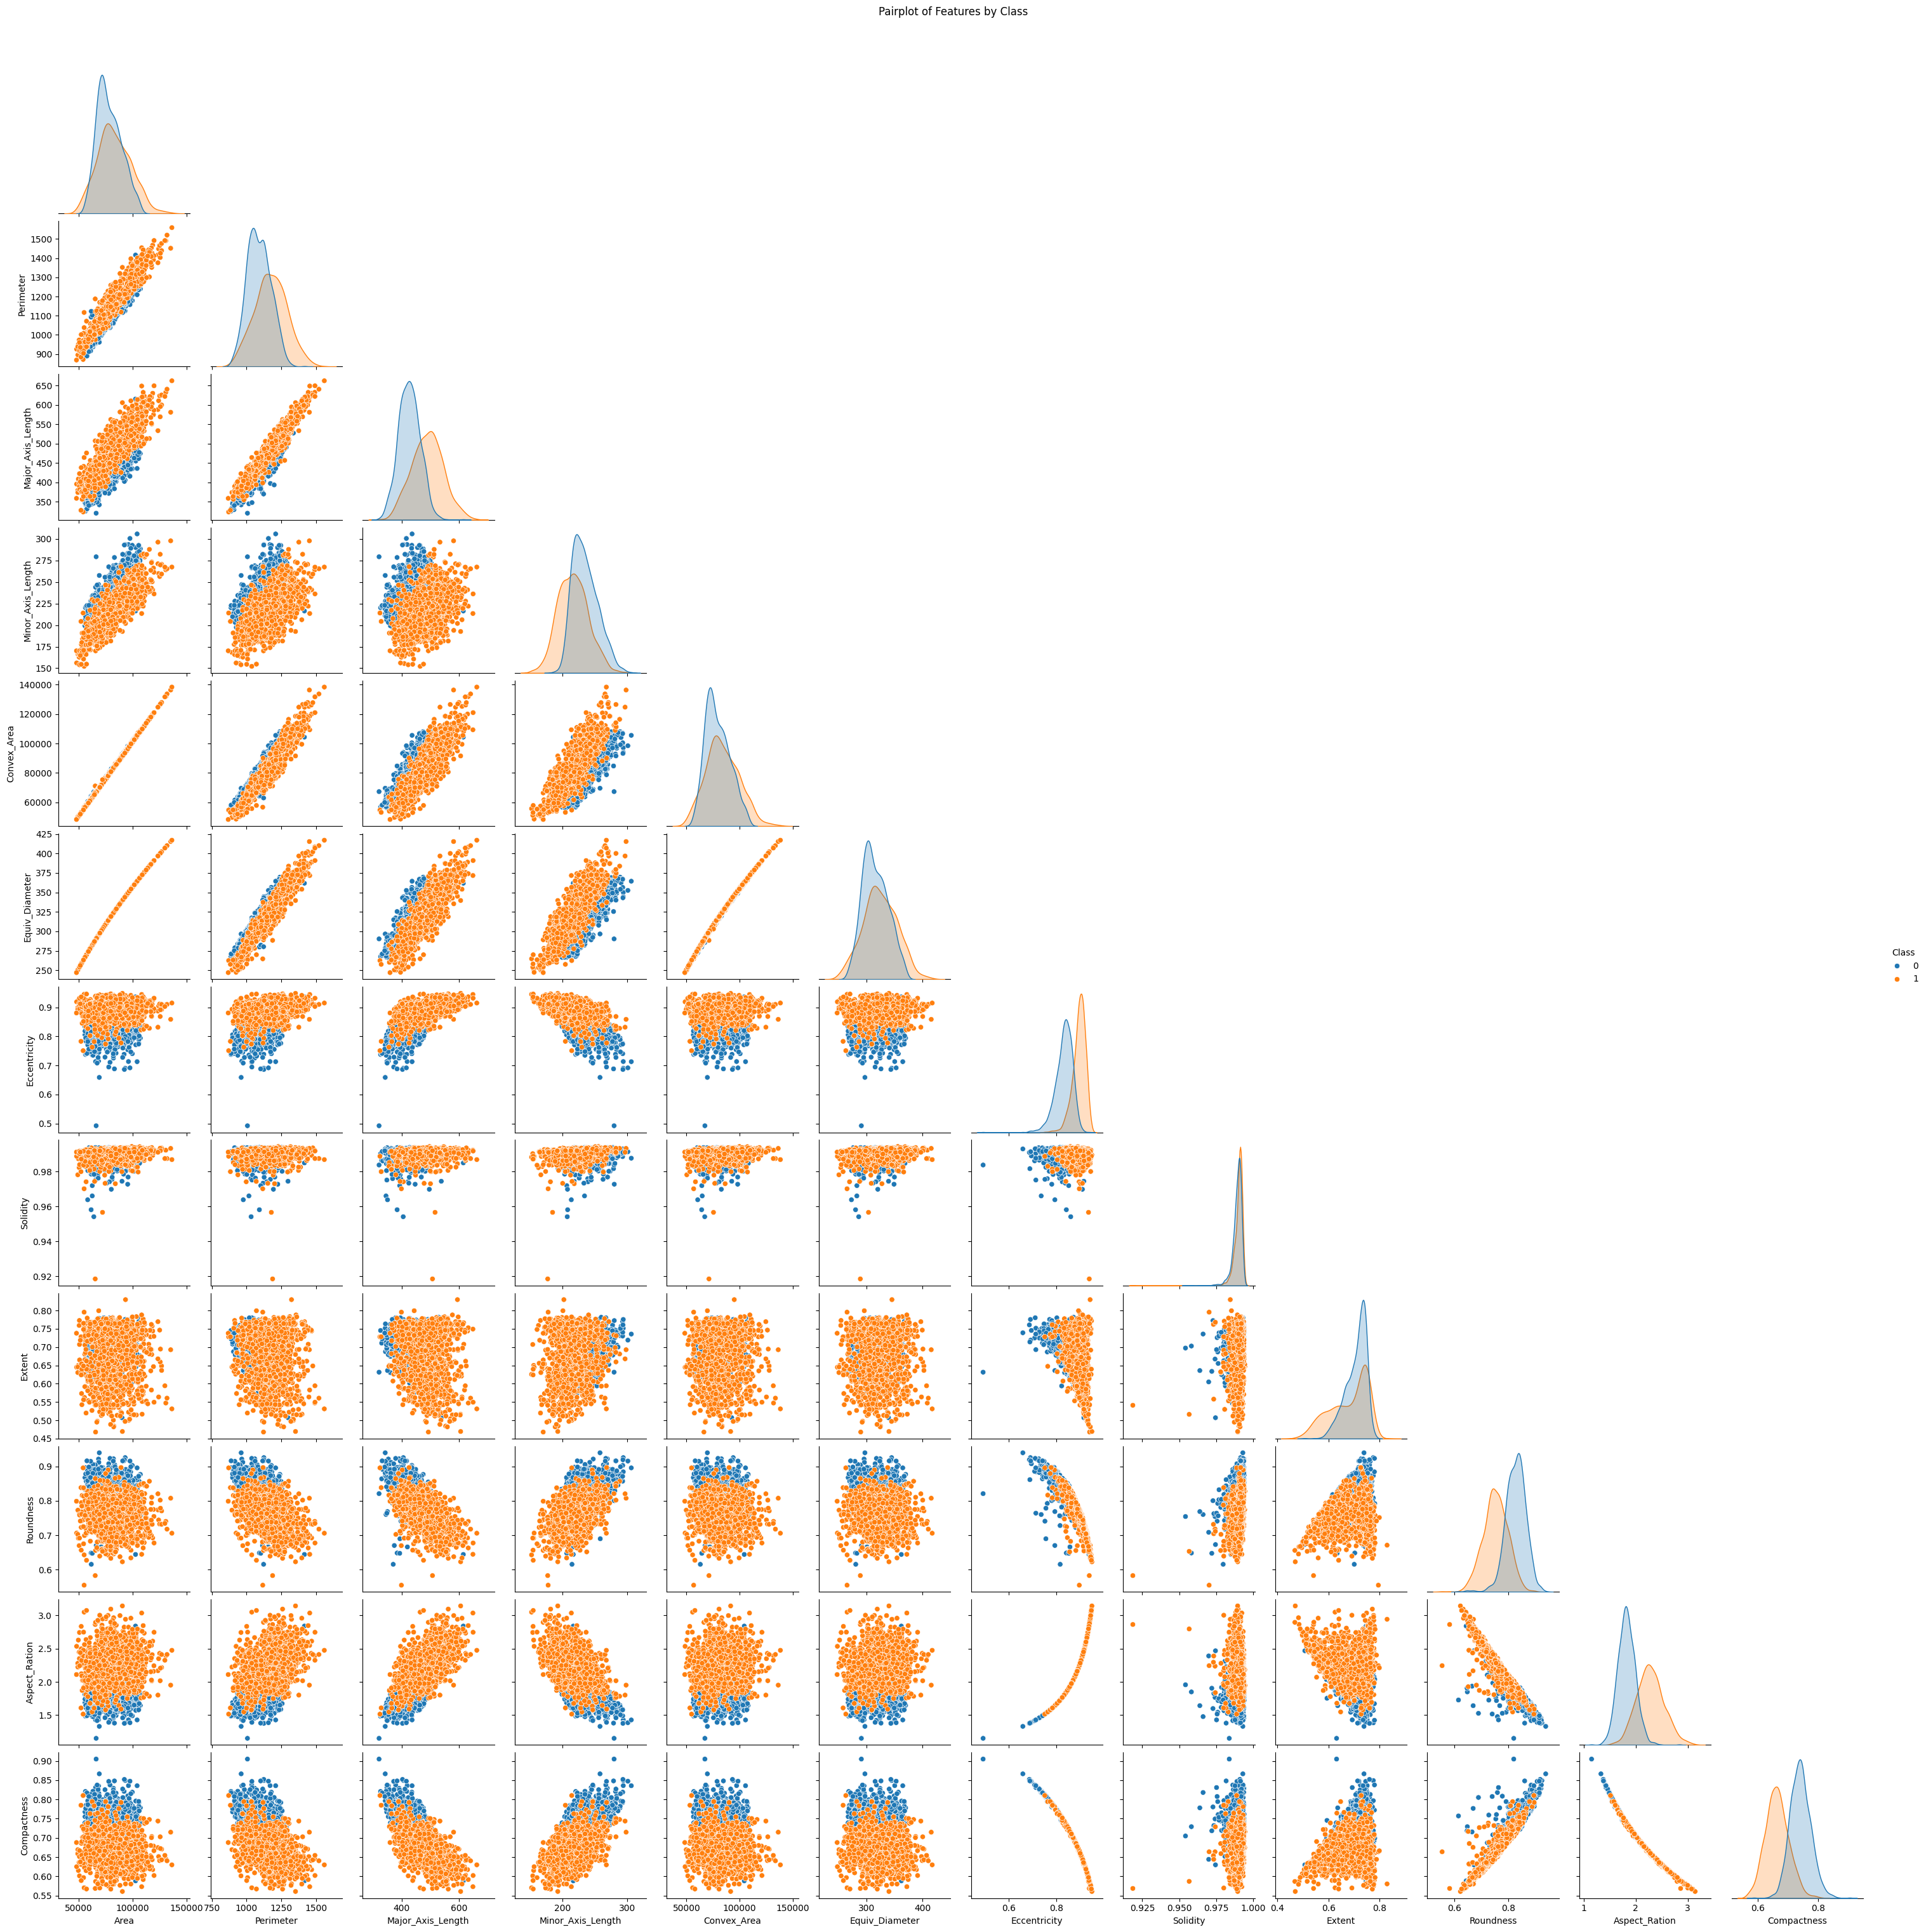

In [370]:
# pairwise relationships
sns.pairplot(df, hue='Class', diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Features by Class", y=1.02)
plt.show()


# K-Nearest Neighbors

## A. Initial model testing

K-Nearest Neighbors is an appropriate model for the dataset due to its ability to classify the seeds based on their distinct physical characteristics represented by numerical features. 

To start, the dataset containing 2500 instances is split into train dataset with 2000 instances, and test dataset with 500 instances.

In [371]:
X_knn = df.drop('Class', axis=1)
y_knn = df['Class']

In [372]:
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (2000, 12)
Training labels shape:  (2000,)
Test data shape:  (500, 12)
Test labels shape:  (500,)


**Feature selection** is applied through the [random forest classifier](https://www.geeksforgeeks.org/feature-selection-using-random-forest/) in order to optimize dimensionality of the dataset by choosing only the most important features.

In [373]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)  
rf.fit(X_train, y_train)

accuracy_before = rf.score(X_test, y_test)
print(f'Accuracy before feature selection: {accuracy_before:.2f}')

# Get feature importance
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

Accuracy before feature selection: 0.87
              Feature  Importance
10      Aspect_Ration    0.201933
11        Compactness    0.167133
6        Eccentricity    0.152187
9           Roundness    0.144112
2   Major_Axis_Length    0.078791
7            Solidity    0.046560
3   Minor_Axis_Length    0.042456
8              Extent    0.038858
1           Perimeter    0.037338
5      Equiv_Diameter    0.031378
0                Area    0.031269
4         Convex_Area    0.027986


The features '**Aspect_Ration**' and '**Compactness**' are considered to be the two most important features having an importance of 0.201933 and 0.167133 respectively.

In [374]:
top_n = 2
top_features = feature_importance_df['Feature'][:top_n].values
print(top_features)

['Aspect_Ration' 'Compactness']


For initial testing, the top two most important features are only considered in order to avoid the curse of dimensionality. Also, to lessen the possibility of noise and overfitting, leading to more stable predictions.

In [375]:
X_train = X_train[top_features]
X_test = X_test[top_features]
print(X_train.shape, X_test.shape)

(2000, 2) (500, 2)


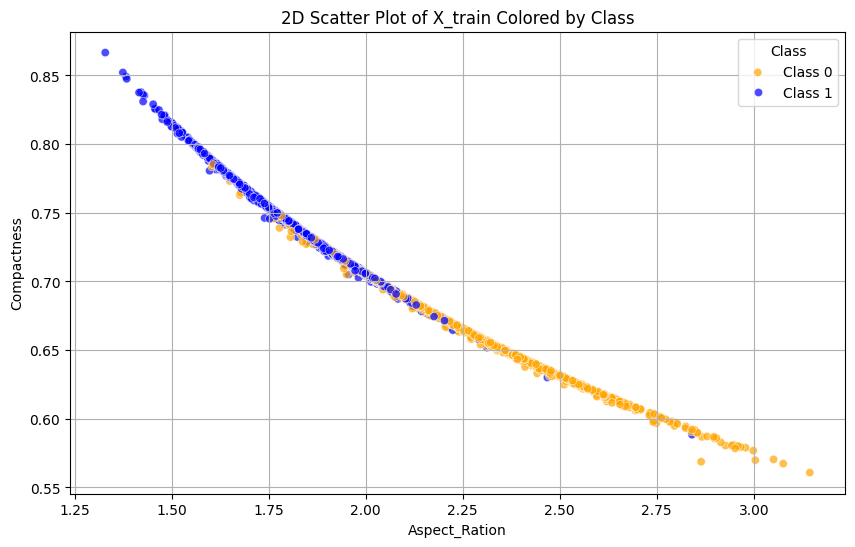

In [376]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=X_train, x=X_train.columns[0], y=X_train.columns[1], hue=y_train, palette={0: 'blue', 1: 'orange'}, alpha=0.7)

plt.title('2D Scatter Plot of X_train Colored by Class')
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.legend(title='Class', loc='upper right', labels=['Class 0', 'Class 1'])
plt.grid(True)
plt.show()

For the initial testing of the dataset, the hyperparameter *k* neighbors is arbitrarily set to 2 to quickly observe the basic functionality and performance of the KNN model. 

In [377]:
k = 2
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

In [378]:
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_predicted
})

print(comparison_df.head(20))

      Actual  Predicted
1447       1          1
1114       0          0
1064       0          0
2287       1          1
1537       1          1
668        0          0
1583       1          1
2404       1          0
497        0          0
2480       1          1
471        0          0
246        0          0
923        0          1
1131       0          0
670        0          0
916        0          0
1414       1          1
1606       1          0
402        0          0
1103       0          0


## B. Error analysis

For the initial model performance, the classification report for the model indicates the following key metrics:

**Precision**: The model is more precise for the Urgup Sivrisi class (0.89) compared to the Cercevelik class (0.76). This suggests that when the model predicts Urgup Sivrisi, it is more likely to be correct than when it predicts Cercevelik.

**Recall**: The model recalls the majority of Cercevelik instances correctly (0.91) but struggles with Urgup Sivrisi (0.71). This means the model misses more instances of Urgup Sivrisi than Cercevelik.

**F1-Score**: Balancing precision and recall, the Cercevelik class achieves a higher F1-score (0.83) than the Urgup Sivrisi class (0.79).

**Overall Accuracy**: The model achieves 81% accuracy across the dataset, demonstrating a good initial performance even by considering only the top two most important features. 

Report:                precision    recall  f1-score   support

   Cercevelik       0.76      0.92      0.83       251
Urgup Sivrisi       0.89      0.71      0.79       249

     accuracy                           0.81       500
    macro avg       0.83      0.81      0.81       500
 weighted avg       0.83      0.81      0.81       500



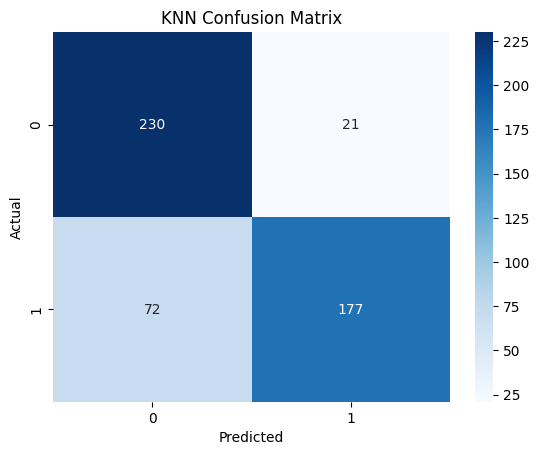

In [379]:
# Write your code here
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

confusion_knn = classification_report(y_test, y_predicted, target_names=['Cercevelik', 'Urgup Sivrisi'])
print(f"Report: {confusion_knn}")

confusion_knn = confusion_matrix(y_test, y_predicted)
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Through the confusion matrix, we could identify problematic areas of each classes.

**Cercevelik**: The high recall (0.91) indicates most instances are correctly classified, but the lower precision (0.76) reveals a tendency to misclassify other classes as Cercevelik.

**Urgup Sivrisi**: The lower recall (0.71) indicates many instances of Urgup Sivrisi are misclassified, which may impact applications requiring high sensitivity for this class.


## C. Improving model performance

In this section, we perform hyperparameter tuning using both Grid Search, given the hyperparameter space is small and well-defined, and evaluation metrics to assess the model's performance.

The only hyperparameter to consider in the model is the number of neighbors.

In [380]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [1, 3, 5, 7, 10, 12, 15, 20, 40, 60, 100],
}
knn = KNeighborsClassifier()

In [381]:
# Grid Search for KNN
knn_grid_search = GridSearchCV(knn, knn_param_grid, cv=5, scoring='f1', return_train_score=True)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 10, 12, 15, 20, 40, 60,
                                         100]},
             return_train_score=True, scoring='f1')

The following table and barplot summarizes the performance of the KNN model based on different configurations of the n_neighbors hyperparameter, evaluated using the F1 Score.

The following visualization shows n_neighbors set to 15 yields the highest F1 score of 0.859711. While, n_neighbors set to 1 yields the lowest with the score of 0.792628.

In [382]:
results_df = pd.DataFrame(knn_grid_search.cv_results_)

performance_df = results_df[['param_n_neighbors', 'mean_test_score']]
performance_df.columns = ['n_neighbors', 'F1 Score']
performance_df = performance_df.sort_values(by='F1 Score', ascending=False)

print("\nHyperparameter Configurations and Corresponding Performance:")
print(performance_df)


Hyperparameter Configurations and Corresponding Performance:
    n_neighbors  F1 Score
6            15  0.859711
5            12  0.858480
9            60  0.858212
10          100  0.857219
7            20  0.855956
8            40  0.852344
4            10  0.851814
3             7  0.847986
2             5  0.836009
1             3  0.823015
0             1  0.793281


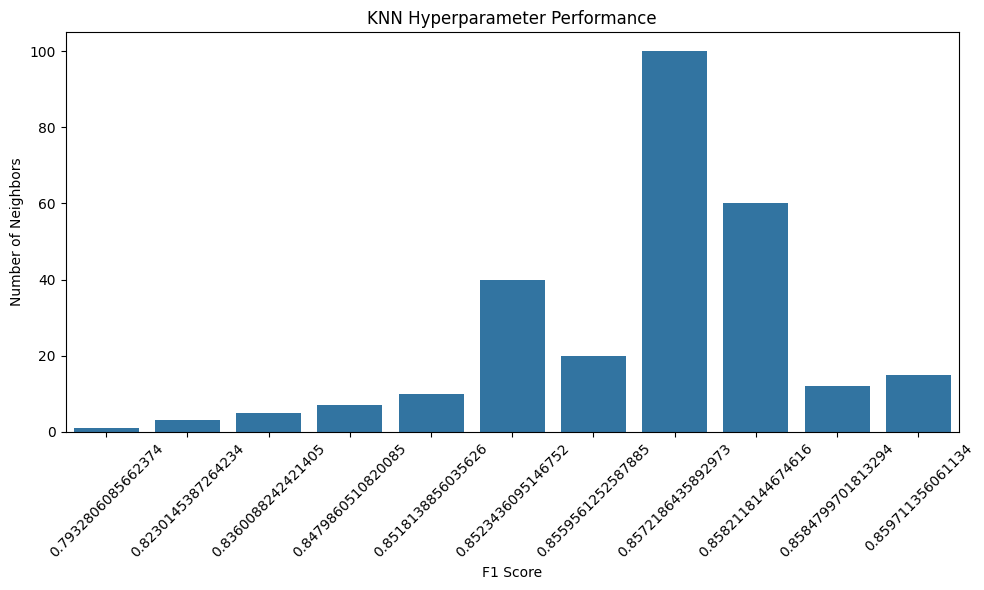

In [383]:
plt.figure(figsize=(10, 6))
sns.barplot(data=performance_df, x='F1 Score', y='n_neighbors')  # Removed palette
plt.title('KNN Hyperparameter Performance')
plt.xlabel('F1 Score')
plt.ylabel('Number of Neighbors')

current_ticks = plt.xticks()[0]
plt.xticks(ticks=current_ticks[::1], rotation=45)

plt.tight_layout()
plt.show()

The optimized KNN model, using the Manhattan metric and 15 neighbors, achieves an overall accuracy of 83%. The classification report shows improved performance for both classes, with precision and recall scores of 0.80 and 0.87 for Cercevelik, and 0.86 and 0.78 for Urgup Sivrisi, respectively. The F1-scores for both classes are also improved, with Cercevelik at 0.84 and Urgup Sivrisi at 0.82.

KNeighborsClassifier(n_neighbors=15)
KNN Performance:
               precision    recall  f1-score   support

   Cercevelik       0.81      0.87      0.84       251
Urgup Sivrisi       0.86      0.79      0.82       249

     accuracy                           0.83       500
    macro avg       0.83      0.83      0.83       500
 weighted avg       0.83      0.83      0.83       500



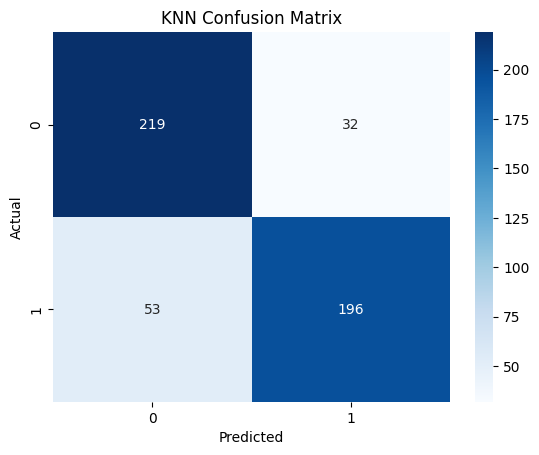

In [384]:
# Evaluate KNN
knn_best_model = knn_grid_search.best_estimator_
print(knn_best_model)
y_predictions = knn_best_model.predict(X_test)
print("KNN Performance:")
print(classification_report(y_test, y_predictions, target_names=['Cercevelik', 'Urgup Sivrisi']))

# Confusion Matrix
confusion_knn = confusion_matrix(y_test, y_predictions)
sns.heatmap(confusion_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression

## A. Initial model training

REFERENCE: [Logistic Regression: Sklearn\Scikit](https://www.datacamp.com/tutorial/understanding-logistic-regression-python)

In [385]:
display(df.head())
print(df.info())
print(df.describe())

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   int32  
dtypes: float64(10), int32(1), int64(2)
memory usage: 244.3 KB
None
                Area    Perimeter  Major_Axis_Length  Minor_Axis_Length  \
count    2500.000000  2500.000

In [386]:
##import logistic regression libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [403]:
# training (70%) and testing (30%)
x_train_logistic, x_test_logistic, y_train_logistic, y_test_logistic = train_test_split(
    X_logistic, y_logistic, test_size=0.3, random_state=1 #CAPITAL X
)

model_logistic = LogisticRegression(max_iter=7500)
model_logistic.fit(x_train_logistic, y_train_logistic) #train on TRAINING data

#test data to make predictions (evaluate model)
y_pred_logistic = model_logistic.predict(x_test_logistic) #predictions via test

#evaluate (accuracy, confusion matrix, and classification report)
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)  #predicted vs actual for test data
conf_matrix_logistic = confusion_matrix(y_test_logistic, y_pred_logistic) 
class_report_logistic = classification_report(y_test_logistic, y_pred_logistic)  

# Confusion matrix results for the test set
true_positives_0 = conf_matrix_logistic[0, 0]  # Cercevelik 
false_negatives_0 = conf_matrix_logistic[0, 1]  # NOT Cercevelik 
true_positives_1 = conf_matrix_logistic[1, 1]  # Urgup Sivrisi 
false_negatives_1 = conf_matrix_logistic[1, 0]  # NOT Urgup Sivrisi

conf_matrix_df = pd.DataFrame(
    conf_matrix_logistic,
    index=["Actual Cercevelik", "Actual Urgup Sivrisi"],
    columns=["Predicted Cercevelik", "Predicted Urgup Sivrisi"],
)

most_correctly_identified = (
    "Cercevelik" if true_positives_0 > true_positives_1 else "Urgup Sivrisi"
)

# Print the results
print("### Initial Logistic Regression Model Training Results ###")
print(f"Accuracy: {accuracy_logistic * 100:.2f}%\n")

print("Logistic Regression Confusion Matrix:")
print(conf_matrix_df) 

print("\nClassification Report:")
print(class_report_logistic)  

print("\n### Result Summary ###")
print(f"True Positives for Cercevelik: {true_positives_0}")
print(f"True Positives for Urgup Sivrisi: {true_positives_1}")
print(f"Most correctly identified pumpkin type: {most_correctly_identified}")
print(
    f"Cercevelik correctly classified: {true_positives_0} out of {conf_matrix_logistic[0].sum()} ({(true_positives_0 / conf_matrix_logistic[0].sum()) * 100:.2f}%)"
)
print(
    f"Urgup Sivrisi correctly classified: {true_positives_1} out of {conf_matrix_logistic[1].sum()} ({(true_positives_1 / conf_matrix_logistic[1].sum()) * 100:.2f}%)"
)


### Initial Logistic Regression Model Training Results ###
Accuracy: 87.47%

Logistic Regression Confusion Matrix:
                      Predicted Cercevelik  Predicted Urgup Sivrisi
Actual Cercevelik                      341                       38
Actual Urgup Sivrisi                    56                      315

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       379
           1       0.89      0.85      0.87       371

    accuracy                           0.87       750
   macro avg       0.88      0.87      0.87       750
weighted avg       0.88      0.87      0.87       750


### Result Summary ###
True Positives for Cercevelik: 341
True Positives for Urgup Sivrisi: 315
Most correctly identified pumpkin type: Cercevelik
Cercevelik correctly classified: 341 out of 379 (89.97%)
Urgup Sivrisi correctly classified: 315 out of 371 (84.91%)


#### Logistic Training Result Summary ####
True Positives for Cercevelik: 341
True Positives for Urgup Sivrisi: 315
Most correctly identified pumpkin type: Cercevelik
Cercevelik correctly classified: 341 out of 379 (89.97%)
Urgup Sivrisi correctly classified: 315 out of 371 (84.91%)

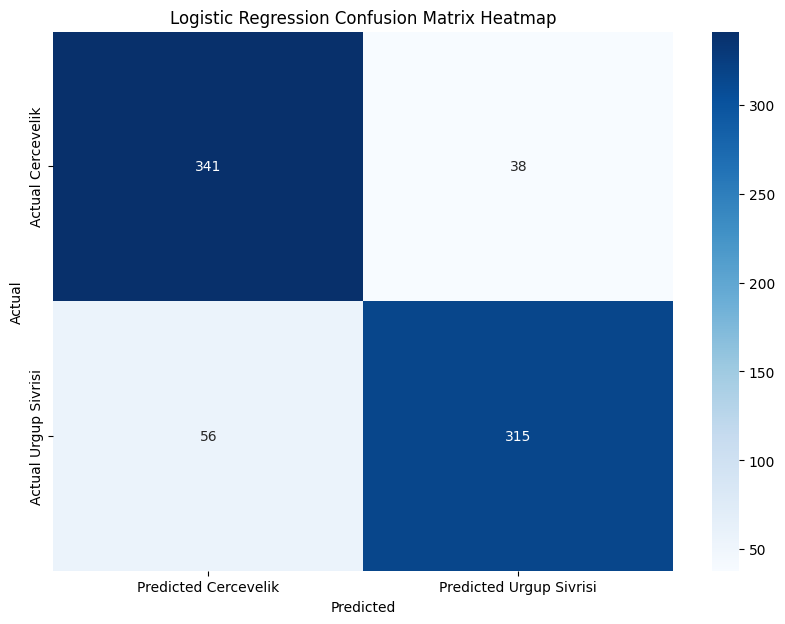

In [388]:
#confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## B. Error analysis

Performance Metrics:

1. Precision: The model is more precise for the Urgup Sivrisi class (0.89) compared to the Cercevelik class (0.86).
- The model predicts Urgup Sivrisi more accurately than Cercevelik.
2. Recall: The model recalls the majority of Cercevelik instances correctly (0.90) but struggles slightly more with Urgup Sivrisi (0.85). 
- This means the model misses more instances of Urgup Sivrisi than Cercevelik.
3. F1-Score: The F1-score balances precision and recall. The Cercevelik class achieves a slightly higher F1-score (0.88) compared to the Urgup Sivrisi class (0.87).
- Slightly better performance with Cercevelik than Urgup Sivrisi.
4. Overall Accuracy: The model achieves a good initial training performance with 87.33% accuracy across the entire dataset.

## C. Improving model performance

REFERENCE: https://www.geeksforgeeks.org/how-to-optimize-logistic-regression-performance/

In [404]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['lbfgs', 'liblinear'],  # Solver options
    'penalty': ['l2'],  # L2 regularization (common choice for Logistic Regression)
    'class_weight': [None, 'balanced']  # Consider class imbalance if needed
}

grid_search = GridSearchCV(model_logistic, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_logistic, y_train_logistic)

# Best model after grid search
best_model_logistic = grid_search.best_estimator_

# 2. Cross-validation for better estimate
cv_scores = cross_val_score(best_model_logistic, X_logistic_standardized, y_logistic, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean():.4f}")

# Train the model with the best parameters
best_model_logistic.fit(x_train_logistic, y_train_logistic)

# Predictions on test set
y_pred_logistic = best_model_logistic.predict(x_test_logistic)

# Model Evaluation
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test_logistic, y_pred_logistic)
class_report_logistic = classification_report(y_test_logistic, y_pred_logistic)

# Confusion matrix analysis
true_positives_0 = conf_matrix_logistic[0, 0]  # Cercevelik
false_negatives_0 = conf_matrix_logistic[0, 1]  # NOT Cercevelik
true_positives_1 = conf_matrix_logistic[1, 1]  # Urgup Sivrisi
false_negatives_1 = conf_matrix_logistic[1, 0]  # NOT Urgup Sivrisi

conf_matrix_df = pd.DataFrame(
    conf_matrix_logistic, index=["Actual Cercevelik", "Actual Urgup Sivrisi"],
    columns=["Predicted Cercevelik", "Predicted Urgup Sivrisi"]
)

# Summary
most_correctly_identified = "Cercevelik" if true_positives_0 > true_positives_1 else "Urgup Sivrisi"

print("### Optimized Logistic Regression Model Training Results ###")
print(f"Accuracy: {accuracy_logistic * 100:.2f}%\n")
print("Logistic Regression Confusion Matrix:")
print(conf_matrix_df)
print("\nClassification Report:")
print(class_report_logistic)
print("\n### Result Summary ###")
print(f"True Positives for Cercevelik: {true_positives_0}")
print(f"True Positives for Urgup Sivrisi: {true_positives_1}")
print(f"Most correctly identified pumpkin type: {most_correctly_identified}")
print(f"Cercevelik correctly classified: {true_positives_0} out of {conf_matrix_logistic[0].sum()} "
      f"({(true_positives_0 / conf_matrix_logistic[0].sum()) * 100:.2f}%)")
print(f"Urgup Sivrisi correctly classified: {true_positives_1} out of {conf_matrix_logistic[1].sum()} "
      f"({(true_positives_1 / conf_matrix_logistic[1].sum()) * 100:.2f}%)")

Cross-validation scores: [0.904 0.894 0.89  0.838 0.882]
Mean cross-validation score: 0.8816
### Optimized Logistic Regression Model Training Results ###
Accuracy: 87.87%

Logistic Regression Confusion Matrix:
                      Predicted Cercevelik  Predicted Urgup Sivrisi
Actual Cercevelik                      342                       37
Actual Urgup Sivrisi                    54                      317

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       379
           1       0.90      0.85      0.87       371

    accuracy                           0.88       750
   macro avg       0.88      0.88      0.88       750
weighted avg       0.88      0.88      0.88       750


### Result Summary ###
True Positives for Cercevelik: 342
True Positives for Urgup Sivrisi: 317
Most correctly identified pumpkin type: Cercevelik
Cercevelik correctly classified: 342 out of 379 (90.24%)
Urgup Sivrisi correctly classi

# Decision Trees

## A. Initial model training

## B. Error analysis

## C. Improving model performance

# Section 9. Model performance summary

# Section 10. Insights and conclusions

# Section 11. Reference